# Data acquisition and preprocessing
1. Using baostock to obtain historical stock data
2. Visualization of stock prices
3. Descriptive analysis of data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import baostock as bs
import warnings


warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
# Baostock document address: http://baostock.com/baostock/index.php/Python_API%E6%96%87%E6%A1%A3
def get_data(code, start, end):
    '''
    Obtain stock data for a specified time range
    :param code: Stock Code
    :param start: Start date
    :param end: Ending date
    :return: DataFrame
    '''
    lg = bs.login()
    print('login respond error_code:'+lg.error_code)
    print('login respond  error_msg:'+lg.error_msg)

    #rs = bs.query_history_k_data_plus(
        #code, "date,code,open,high,low,close,volume,amount,turn,pctChg", start, end, frequency="d")
    rs = bs.query_history_k_data_plus(
        code, "date,code,open,high,low,close,volume,amount,turn,pctChg,peTTM,psTTM,pcfNcfTTM", start, end, frequency="d")
        
    print('query_history_k_data_plus respond error_code:'+rs.error_code)
    print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

    data_list = []
    while (rs.error_code == '0') & rs.next():
        # Obtain a record and merge the records together
        data_list.append(rs.get_row_data())
    data = pd.DataFrame(data_list, columns=rs.fields)

    # #### Logout ####
    bs.logout()

    return data


def clean_data(data):
    '''
1. Convert dates into time series and set them as indexes
2. Sort data in ascending chronological order
3. Delete missing values
4. Price, transaction volume, and fluctuation data are converted from str to float, while transaction volume data is converted from str to int
5. Convert the units of fluctuations to decimals
    
    '''
    data['date'] = pd.to_datetime(data['date'])
    data = data.set_index("date")
    data = data.sort_index()
    data.drop(data[data["pctChg"] == "None"].index, axis=0, inplace=True)

    float_types = ['open', 'high', 'low', 'close', 'amount', 'pctChg']
    for item in float_types:
        data[item] = data[item].astype('float')
    
    data['pctChg'] /= 100
    data['volume'] = data['volume'].astype('int')
    data['turn'] = [0 if x == "" else float(x) for x in data["turn"]]


    return data


In [3]:
code = 'sh.600036'
start = '2018-01-01'
end = '2023-08-01'

df = get_data(code, start, end)
df = clean_data(df)
df.to_csv(f'./{code}_history_data.csv', index=True)

df.head().append(df.tail())

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
logout success!


,code,open,high,low,close,volume,amount,turn,pctChg,peTTM,psTTM,pcfNcfTTM
date,,,,,,,,,,,,
2018-01-02,sh.600036,29.02,30.06,29.02,29.62,67591307,2.009147e+09,0.327653,0.020675,10.866575,3.483596,10.982722
2018-01-03,sh.600036,29.74,30.48,29.64,29.97,71850339,2.161449e+09,0.348299,0.011816,10.994978,3.524759,11.112498
2018-01-04,sh.600036,30.28,30.36,29.40,29.65,51686593,1.540870e+09,0.250554,-0.010677,10.877581,3.487124,10.993846
2018-01-05,sh.600036,29.87,30.25,29.46,30.10,47990820,1.435733e+09,0.232638,0.015177,11.042671,3.540048,11.160700
2018-01-08,sh.600036,29.92,30.05,29.31,29.47,65857890,1.943542e+09,0.319250,-0.020930,10.811545,3.465954,10.927104
2023-07-26,sh.600036,33.27,33.73,33.07,33.35,50175140,1.673625e+09,0.243200,0.002405,,,
2023-07-27,sh.600036,33.50,33.82,33.20,33.66,54848896,1.845231e+09,0.265900,0.009295,,,
2023-07-28,sh.600036,33.49,35.29,33.41,35.10,125628759,4.358344e+09,0.609000,0.042781,6.285755,2.577583,-12.046549
2023-07-31,sh.600036,35.52,36.04,35.01,35.56,116275605,4.127807e+09,0.563700,0.013105,6.368132,2.611363,-12.204424


1. Re-read the data file and remove the code column
2. Visualize the 'close' data

             open   high    low  close    volume        amount      turn  \
date                                                                       
2018-01-02  29.02  30.06  29.02  29.62  67591307  2.009147e+09  0.327653   
2018-01-03  29.74  30.48  29.64  29.97  71850339  2.161449e+09  0.348299   
2018-01-04  30.28  30.36  29.40  29.65  51686593  1.540870e+09  0.250554   
2018-01-05  29.87  30.25  29.46  30.10  47990820  1.435733e+09  0.232638   
2018-01-08  29.92  30.05  29.31  29.47  65857890  1.943542e+09  0.319250   

              pctChg      peTTM     psTTM  pcfNcfTTM  
date                                                  
2018-01-02  0.020675  10.866575  3.483596  10.982722  
2018-01-03  0.011816  10.994978  3.524759  11.112498  
2018-01-04 -0.010677  10.877581  3.487124  10.993846  
2018-01-05  0.015177  11.042671  3.540048  11.160700  
2018-01-08 -0.020930  10.811545  3.465954  10.927104  


数据的描述性分析：
               open         high          low        close        volume  \
count  1355.000000  1355.000000  1355.000000  1355.000000  1.355000e+03   
mean     37.963033    38.467838    37.476923    37.968546  6.005681e+07   
std       8.249653     8.383525     8.090408     8.236590  3.086657e+07   
min      24.400000    25.050000    24.380000    24.570000  1.622022e+07   
25%      32.305000    32.780000    32.070000    32.375000  3.892904e+07   
50%      35.530000    35.980000    35.160000    35.530000  5.282752e+07   
75%      42.995000    43.310000    42.270000    42.910000  7.076974e+07   
max      58.210000    58.920000    57.610000    58.500000  2.504770e+08   

             amount         turn       pctChg        peTTM        psTTM  \
count  1.355000e+03  1355.000000  1355.000000  1351.000000  1351.000000   
mean   2.307853e+09     0.291128     0.000478     9.789684     3.357416   
std    1.325740e+09     0.149628     0.019229     2.113580     0.619199   
min    4.4680

Text(0.5, 1.0, '2018-01-02~2023-08-01股票sh.600036历史股价')

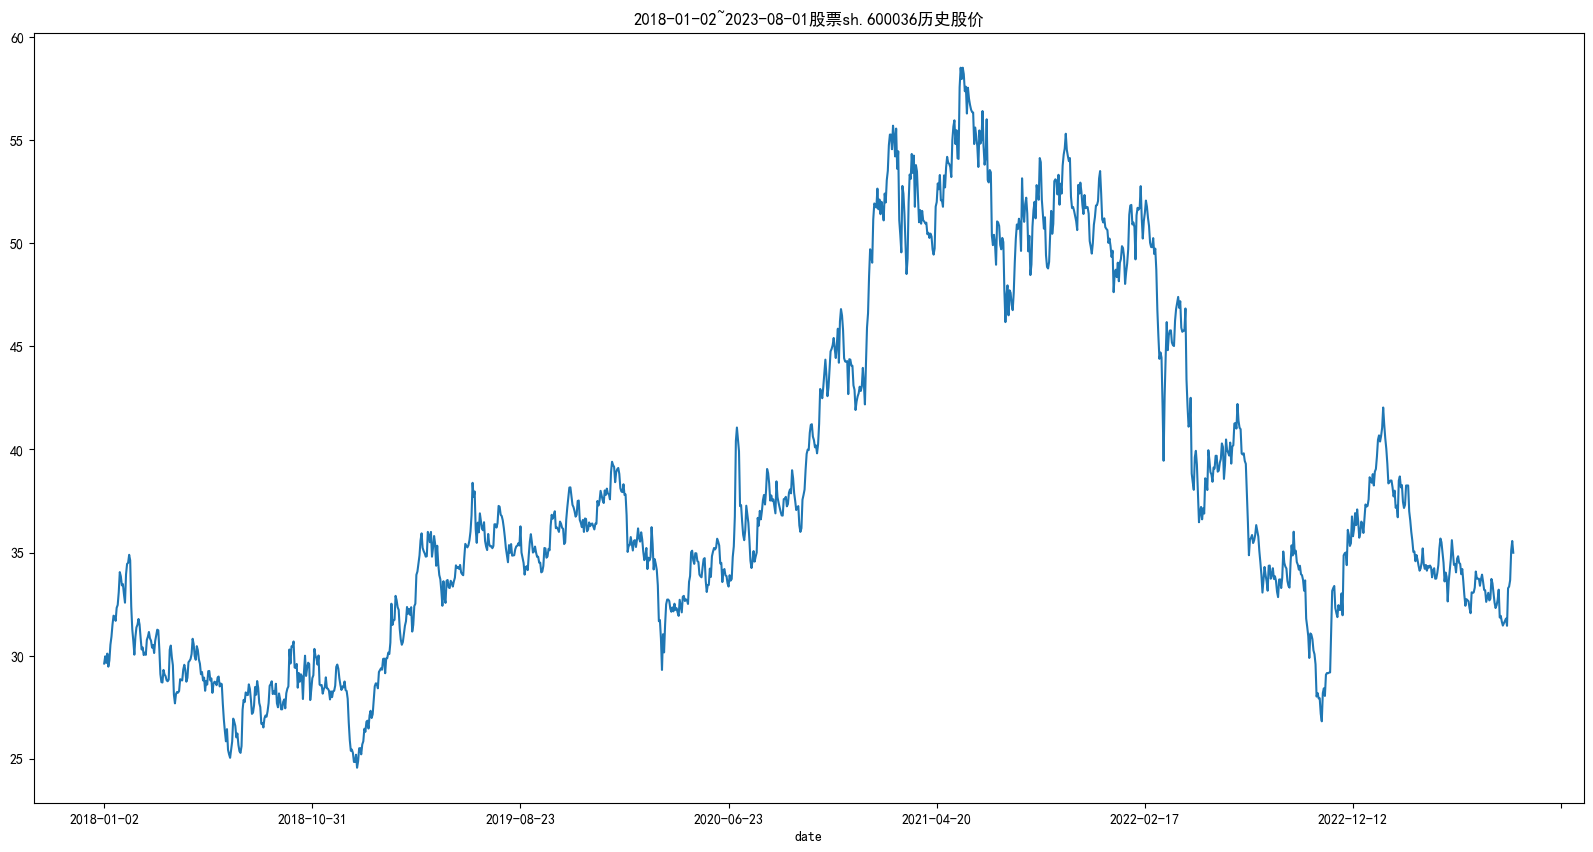

In [4]:
code = 'sh.600036'
df = pd.read_csv(f'{code}_history_data.csv', index_col=0)
df = df.drop(columns=['code'])
print(df.head())
print('Descriptive analysis of data:\n', df.describe())

df['close'].plot()

start = df.index[0]
end = df.index[-1]
plt.title(f'{start}~{end} {code}Historical Stock Price')

1. Correlation of data features displayed in thermal maps
2. By observing the correlation of each data column, identify features with strong correlation with close

In [6]:
df_close = df[['close']].copy()

df['EMA_9'] = df['close'].ewm(9).mean().shift()
df['SMA_5'] = df['close'].rolling(5).mean().shift()
df['SMA_10'] = df['close'].rolling(10).mean().shift()
df['SMA_15'] = df['close'].rolling(15).mean().shift()
df['SMA_30'] = df['close'].rolling(30).mean().shift()

def calculate_macd(data, short_period, long_period, signal_period):
    short_ema = data.ewm(span=short_period, adjust=False).mean()
    long_ema = data.ewm(span=long_period, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()
    return macd_line, signal_line

def calculate_rsi(data, period):
    delta = data.diff()
    gains = delta.where(delta > 0, 0)
    losses = -delta.where(delta < 0, 0)
    
    avg_gain = gains.rolling(window=period, min_periods=1).mean()
    avg_loss = losses.rolling(window=period, min_periods=1).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_wpr(data, period):
    highest_high = data.rolling(window=period, min_periods=1).max()
    lowest_low = data.rolling(window=period, min_periods=1).min()
    wpr = (highest_high - data) / (highest_high - lowest_low) * -100
    return wpr

# Calculate MACD
short_period = 12
long_period = 26
signal_period = 9
df['MACD'], df['Signal_Line'] = calculate_macd(df['close'], short_period, long_period, signal_period)

# Calculate RSI
rsi_period = 14
df['RSI'] = calculate_rsi(df['close'], rsi_period)

# Calculate WPR
wpr_period = 14
df['WPR'] = calculate_wpr(df['close'], wpr_period)

与close的相关性：
 pcfNcfTTM     -0.322
pctChg         0.038
volume         0.112
turn           0.112
RSI            0.121
WPR            0.132
MACD           0.223
Signal_Line    0.227
amount         0.455
peTTM          0.627
psTTM          0.795
SMA_30         0.965
SMA_15         0.980
EMA_9          0.982
SMA_10         0.985
SMA_5          0.991
open           0.997
low            0.999
high           0.999
close          1.000
Name: close, dtype: float64


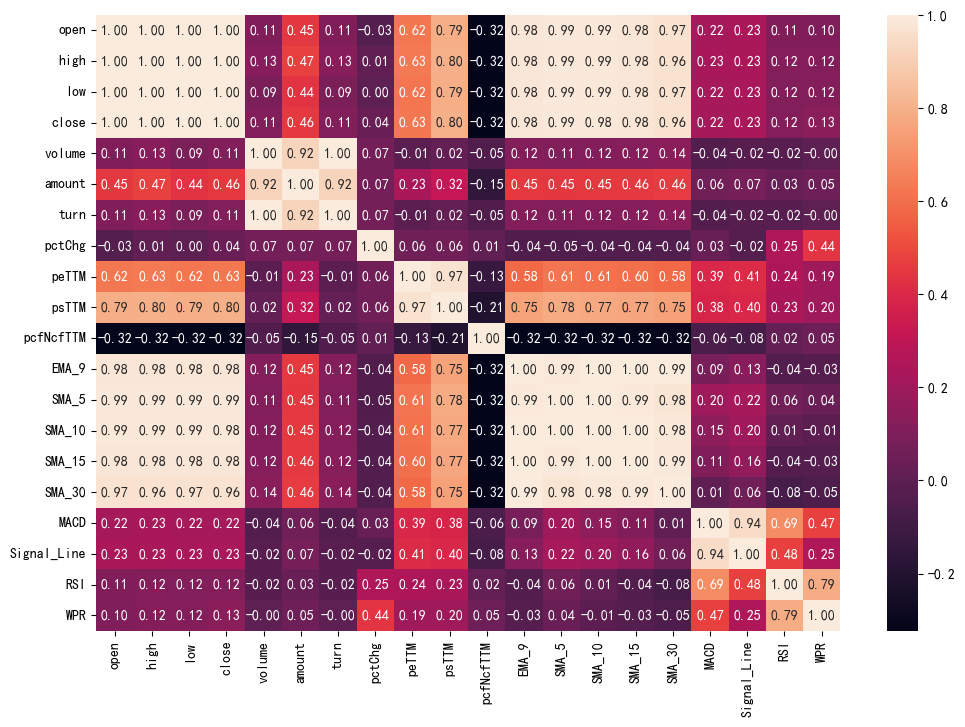

In [7]:
import seaborn as sns

cols = df.columns
cor = round(df[cols].corr(),3)
print('Correlation with close:\n', cor['close'].sort_values())

plt.figure(figsize=(12, 8))
sns.heatmap(round(cor,3), annot=True, fmt='.2f')
plt.show()

In [8]:
new_df = df[['close']].copy()

train_size = round(len(new_df) * 0.7)
train_data = new_df[:train_size]
test_data = new_df[train_size:]

print(new_df.shape, train_data.shape, test_data.shape)

(1355, 1) (948, 1) (407, 1)


In [9]:
new_df2 = df.drop(columns=['volume', 'pctChg'])

train_size = round(len(df) * 0.7)
train_data2 = new_df2[:train_size]
test_data2 = new_df2[train_size:]

x_train2 = train_data2.drop('close', axis=1)
y_train2 = train_data2[['close']].copy()
x_test2 = test_data2.drop('close', axis=1)
y_test2 = test_data2[['close']].copy()

#print(train_data2.shape, test_data2.shape)
#print(x_train2.shape, y_train2.shape, x_test2.shape, y_test2.shape)

## Prediction Model 1: Moving Average Method
1. Use the average value of the close sliding window as the next predicted value
2. The window size is taken as test_ The size of the dataset

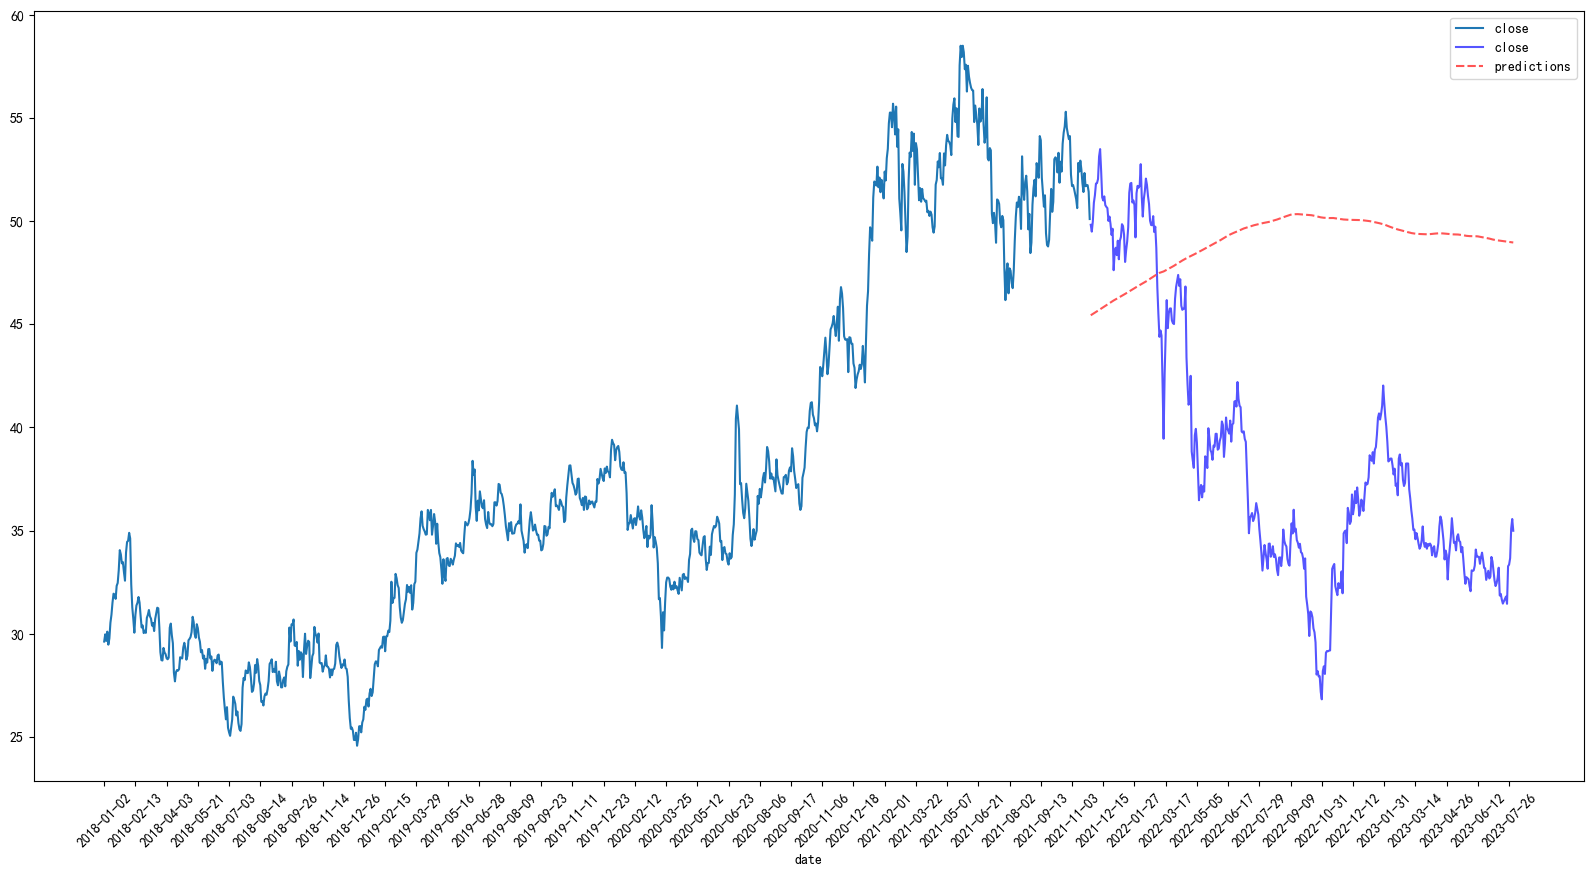

In [10]:
preds_ma = []
l = len(test_data)

for i in range(l):
    a = train_data['close'][len(train_data) - l + i:].sum() + sum(preds_ma)
    a /= l
    preds_ma.append(a)

# Visualize prediction results
test_data_knn = test_data.copy()
test_data_knn['predictions'] = preds_ma

plt.figure()
sns.lineplot(train_data[['close']])
sns.lineplot(test_data_knn[['close', 'predictions']], palette="seismic")
plt.xticks(new_df.index[::30], rotation = 45)
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate MSE, RMSE
mse_ma = mean_squared_error(test_data['close'], preds_ma)
rmse_ma = sqrt(mse_ma) 
print('MSE of Prediction: ', mse_ma, '\n')
print('RMSE of Prediction: ', rmse_ma)

移动平均法预测结果的MSE：  168.58428367649202 

移动平均法预测结果的RMSE：  12.984001065792162


## Prediction model 2: k-nearest neighbor

In [12]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train2)
y_train_scaled = scaler.fit_transform(y_train2)
x_train_knn = pd.DataFrame(x_train_scaled, columns=x_train2.columns, index=x_train2.index)
y_train_knn = pd.DataFrame(y_train_scaled, columns=y_train2.columns, index=y_train2.index)

x_test_scaled = scaler.fit_transform(x_test2)
y_test_scaled = scaler.fit_transform(y_test2)
x_test_knn = pd.DataFrame(x_test_scaled, columns=x_test2.columns, index=x_test2.index)
y_test_knn = pd.DataFrame(y_test_scaled, columns=y_test2.columns, index=y_test2.index)

# Using gridsearch to find the best parameters
params = {'n_neighbors': [2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=5)

# Fit the model and make predictions
model_knn.fit(x_train_knn, y_train_knn)
preds_knn = model_knn.predict(x_test_knn)

"\nfrom sklearn import neighbors\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.preprocessing import MinMaxScaler \n\n\nscaler = MinMaxScaler(feature_range=(0, 1))\n\nx_train_scaled = scaler.fit_transform(x_train2)\ny_train_scaled = scaler.fit_transform(y_train2)\nx_train_knn = pd.DataFrame(x_train_scaled, columns=x_train2.columns, index=x_train2.index)\ny_train_knn = pd.DataFrame(y_train_scaled, columns=y_train2.columns, index=y_train2.index)\n\nx_test_scaled = scaler.fit_transform(x_test2)\ny_test_scaled = scaler.fit_transform(y_test2)\nx_test_knn = pd.DataFrame(x_test_scaled, columns=x_test2.columns, index=x_test2.index)\ny_test_knn = pd.DataFrame(y_test_scaled, columns=y_test2.columns, index=y_test2.index)\n\n# 使用gridsearch查找最佳参数\nparams = {'n_neighbors': [2,3,4,5,6,7,8,9]}\nknn = neighbors.KNeighborsRegressor()\nmodel_knn = GridSearchCV(knn, params, cv=5)\n\n# 拟合模型并进行预测\nmodel_knn.fit(x_train_knn, y_train_knn)\npreds_knn = model_knn.predict(x_test_knn)\n"

In [13]:
# Visualize prediction results
y_test_knn['predictions'] = preds_knn
y_test_knn_invscaled = scaler.inverse_transform(y_test_knn)
y_test_pred_knn = pd.DataFrame(y_test_knn_invscaled, columns=y_test_knn.columns, index=y_test_knn.index)

plt.figure()
# sns.lineplot(train_data2[['close']])
sns.lineplot(y_test_pred_knn[['close', 'predictions']], palette="seismic")
plt.xticks(y_test_pred_knn.index[::10], rotation = 45)
plt.show()

NameError: name 'preds_knn' is not defined

In [ ]:
#calculate MSE, RMSE
mse_knn = mean_squared_error(y_test_pred_knn['close'], y_test_pred_knn['predictions'])
rmse_knn = sqrt(mse_knn) 
print('MSE of Prediction: ', mse_knn, '\n')
print('RMSE of Prediction: ', rmse_knn)

k-近邻法预测结果的MSE：  181.6713043630844 

k-近邻法预测结果的RMSE：  13.478549787090762


## Prediction Model 3: LSTM

In [ ]:
# Import the required libraries
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam


scaler = MinMaxScaler(feature_range=(0, 1))

#new_df = df[['close']].copy()
new_df = df[['close','high','low','open','SMA_5']].copy()
new_df_scaled = scaler.fit_transform(new_df)
df_lstm = pd.DataFrame(new_df_scaled, columns=new_df.columns, index=new_df.index)
df_lstm
# train_scaled = scaler.fit_transform(train_data)
# train_lstm = pd.DataFrame(train_scaled, columns=train_data.columns, index=train_data.index)

# test_scaled = scaler.fit_transform(test_data)
# test_lstm = pd.DataFrame(test_scaled, columns=test_data.columns, index=test_data.index)

,close,high,low,open,SMA_5
date,,,,,
2018-01-02,0.770053,0.768402,0.807619,0.777574,NaN
2018-01-03,0.773619,0.773788,0.819048,0.792279,NaN
2018-01-04,0.777184,0.775583,0.826667,0.797794,NaN
2018-01-05,0.778966,0.775583,0.830476,0.801471,NaN
2018-01-08,0.784314,0.784560,0.828571,0.801471,NaN
...,...,...,...,...,...
2023-07-26,0.142602,0.138241,0.150476,0.148897,0.137747
2023-07-27,0.147950,0.149013,0.156190,0.148897,0.140411
2023-07-28,0.174688,0.165171,0.160000,0.154412,0.144216


In [ ]:
def proc_data(data, lb):
    '''
    data: Data to be divided
    lb: Window size
    '''
    x, y = [], []
    for i in range(lb, len(data)):
        x.append(data.iloc[i-lb:i])
        try:
            y.append(data['close'][i])
        except:
            y.append(data['close'][i-1])

    return np.array(x), np.array(y)



days = 1
x, y = proc_data(df_lstm, days)
train_size = int(len(df_lstm) * 0.7)
x_train_lstm, x_test_lstm = x[:train_size], x[train_size:]
y_train_lstm, y_test_lstm = y[:train_size], y[train_size:]
y_train_lstm, y_test_lstm = y_train_lstm.reshape(-1, 1), y_test_lstm.reshape(-1, 1)

# x_train_lstm, y_train_lstm = proc_data(train_lstm, days)
# x_test_lstm, y_test_lstm = proc_data(test_lstm, days)
print(x_train_lstm.shape, y_train_lstm.shape)
print(x_test_lstm.shape, y_test_lstm.shape)

(948, 1, 5) (948, 1)
(406, 1, 5) (406, 1)


In [ ]:
# Creating and fitting LSTM networks
params = {
    'train_batch_size': 300, # Training batch
    'n_epochs': 100, # Training rounds
    'learning_rate': 0.03, # Learning rate
    'lr_decay_rate': 0.8, # Learning rate decay rate
    'n_decay_each_epoch': 6, # Number of learning rate decay per epoch
    'n_steps': days
}

n_steps = params['n_steps']
train_batch_size = params['train_batch_size']
n_epochs = params['n_epochs']
learning_rate = params['learning_rate']
lr_decay_rate = params['lr_decay_rate']
n_decay_each_epoch = params['n_decay_each_epoch']

model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(n_steps, 5)))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
# model.add(Dropout(0.2))
model.add(Dense(16, activation='linear'))
model.add(Dense(1, activation='linear'))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = learning_rate,
    decay_steps = n_epochs // n_decay_each_epoch,
    decay_rate = lr_decay_rate
)


model.compile(
    loss='mean_squared_error', 
    optimizer=Adam(learning_rate=lr_schedule),
    metrics='mean_squared_error'
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 128)            68608     
                                                                 
 dropout_2 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 119073 (465.13 KB)
Trainable params: 119073 (465.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(
    x_train_lstm,
    y_train_lstm,
    batch_size=train_batch_size, 
    epochs=n_epochs,
    validation_data=(x_test_lstm, y_test_lstm),
    shuffle=False
)

Epoch 1/100
4/4 [==============================] - 3s 193ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: nan - mean_squared_error: nan - val_los

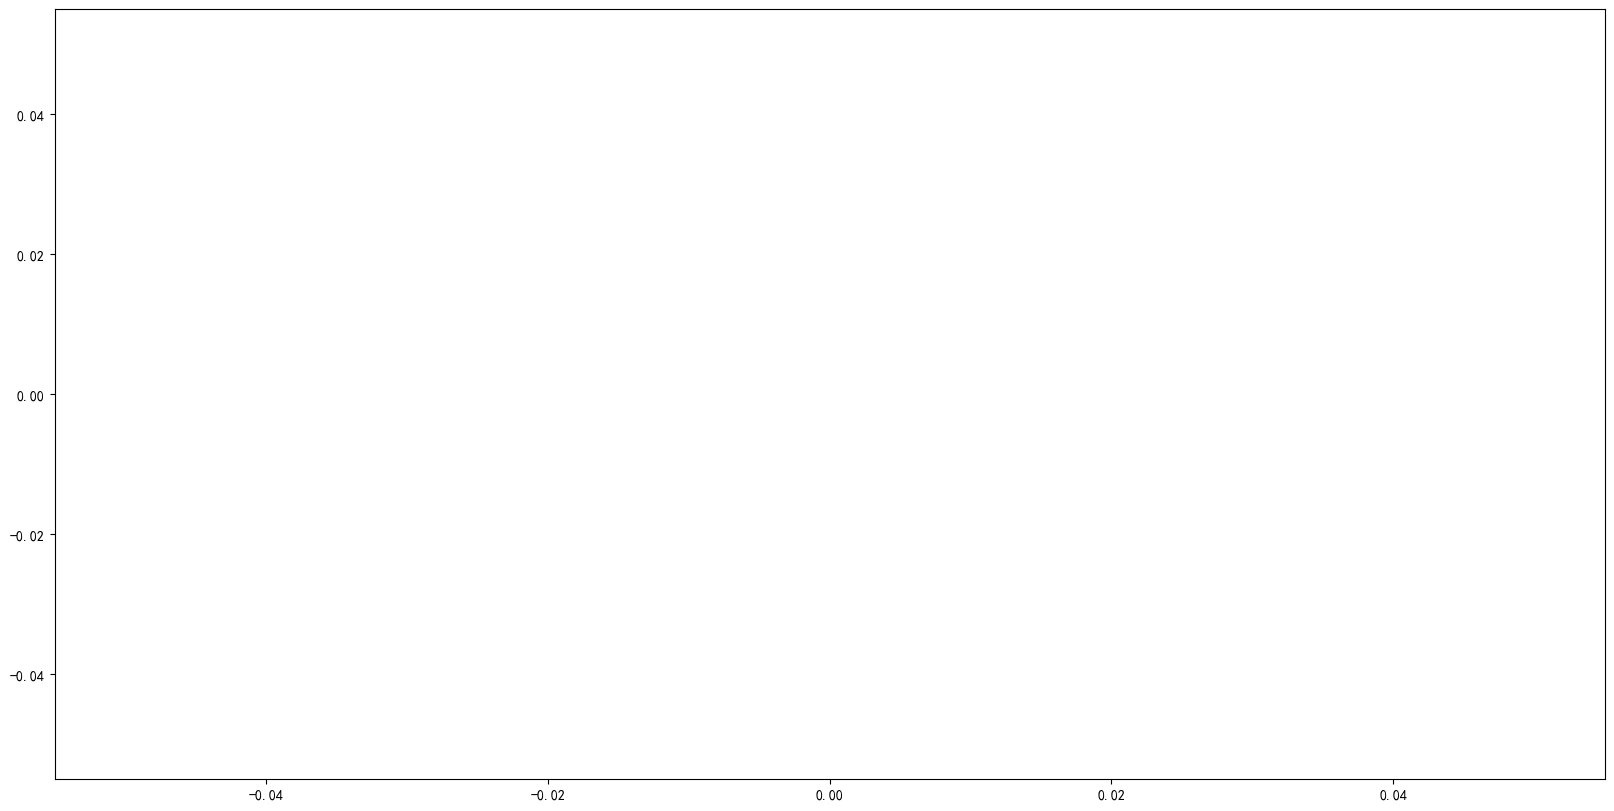

In [ ]:
plt.figure()
# Display training process
sns.lineplot(history.history['loss'])
sns.lineplot(history.history['val_loss'])
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test_lstm, y_test_lstm)
loss, accuracy

13/13 [==============================] - 0s 1ms/step - loss: nan - mean_squared_error: nan


(nan, nan)

In [ ]:
#Randomly extract a single data slice from the test set for prediction
import random

i=random.randint(0, len(y_test_lstm))
xt = model.predict(x_test_lstm[i].reshape(1, days, 1))
print(f'Prediction:{xt}, Actual value:{y_test_lstm[i, 0]}')

ValueError: cannot reshape array of size 5 into shape (1,1,1)

In [ ]:
# Predict all slices in the test set in a sequential manner, and check the fit between the predicted results and the true values.

preds_lstm = model.predict(x_test_lstm)
preds_lstm_invscaled = scaler.inverse_transform(preds_lstm)
y_test_lstm_invscaled = scaler.inverse_transform(y_test_lstm)

errs = preds_lstm_invscaled - y_test_lstm_invscaled


errs = pd.DataFrame(errs)
errs.describe()

13/13 [==============================] - 0s 1ms/step


ValueError: non-broadcastable output operand with shape (406,1) doesn't match the broadcast shape (406,5)

             close  pred_close
date                          
2022-01-13  577.40  565.698914
2022-01-14  606.85  577.272034
2022-01-17  586.80  604.348999
2022-01-18  569.99  585.978149
2022-01-19  569.13  570.368103


<Axes: xlabel='date'>

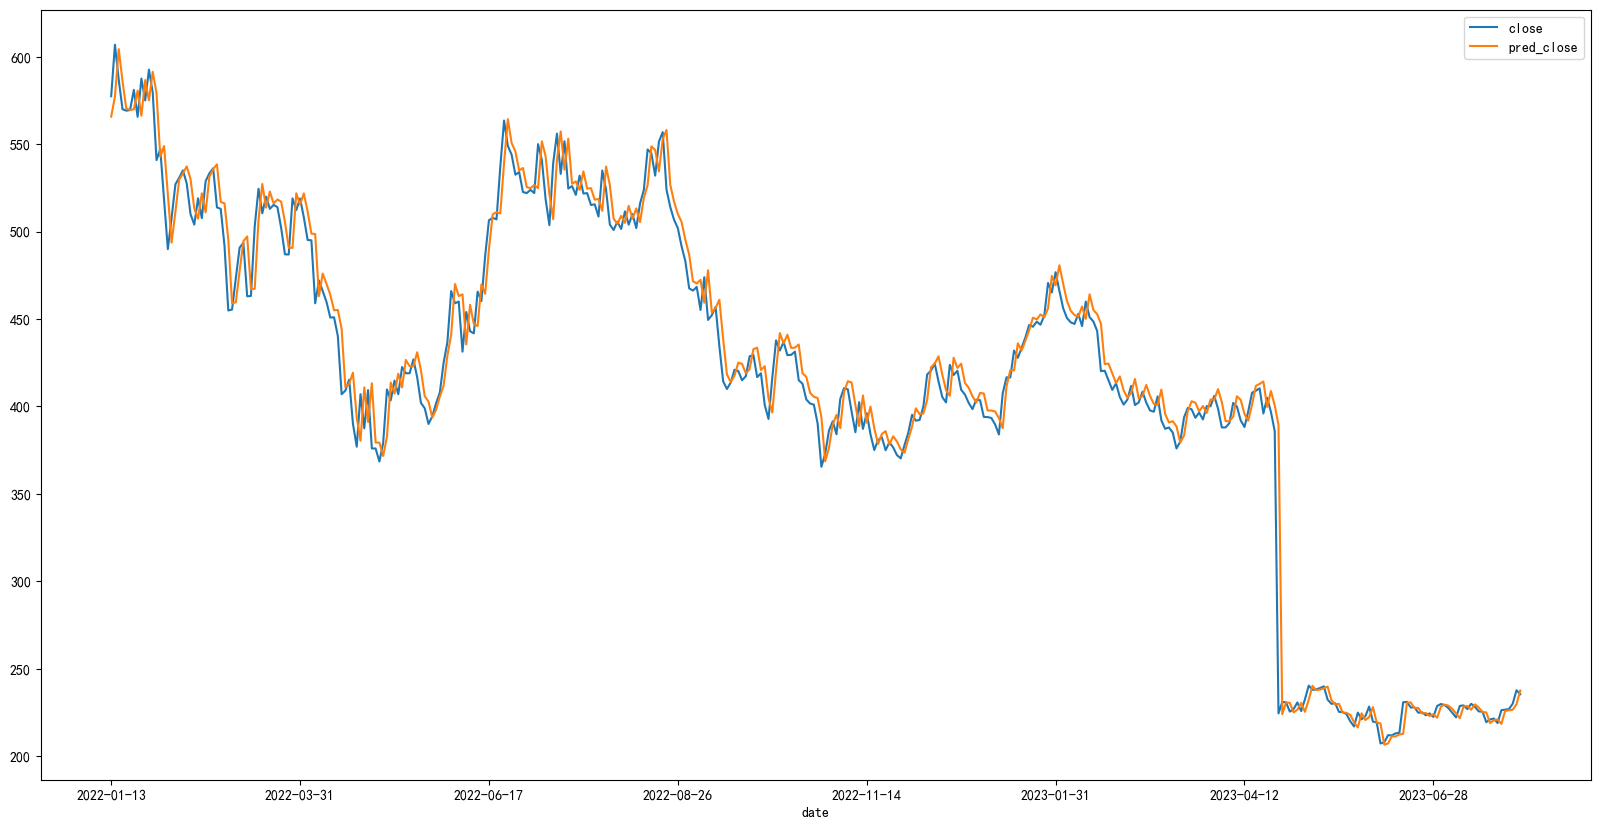

In [ ]:
y_test_lstm_new = pd.DataFrame(y_test_lstm_invscaled, columns=['close'], index=new_df.index[train_size:len(new_df)-days])
y_test_lstm_new['pred_close'] = preds_lstm_invscaled

print(y_test_lstm_new.head())
y_test_lstm_new.plot()


In [ ]:
#calculate MSE, RMSE
mse_lstm = mean_squared_error(preds_lstm_invscaled, y_test_lstm_invscaled)
rmse_lstm = np.sqrt(mse_lstm) 
print('MSE of Prediction: ', mse_lstm, '\n')
print('RMSE of Prediction ', rmse_lstm)

LSTM预测结果的MSE：  234.88738853965438 

LSTM预测结果的RMSE：  15.326036295782885


In [ ]:
model.save('aug18_stock_forecasting_lstm_model.h5',include_optimizer=True) # Save model ontology
model.save_weights('aug18_stock_forecasting_lstm_model_weights.h5') # Save Model Weights

## Prediction Model 4:XGBoost

In [14]:
# Import the required libraries
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV


scaler_x = StandardScaler()
scaler_y = StandardScaler()


#new_df = df[['open','low','high','close','EMA_9','SMA_5','amount','turn','volume','pctChg']].copy()
new_df = df.copy()
#new_df = df[['open','high','close','WPR','pctChg']].copy()
new_df_scaled = scaler_x.fit_transform(new_df)
df_xgb = pd.DataFrame(new_df_scaled, columns=new_df.columns, index=new_df.index)
df_xgb = df_xgb.iloc[:-1]
print(df_xgb.shape)

y_df = new_df[['close']].copy()
y_df = y_df.shift(-1).dropna()
y_df_scaled = scaler_y.fit_transform(y_df)
y_df_scaled.shape

(1354, 20)


(1354, 1)

In [15]:
train_size = int(len(df_xgb-30) * 0.7)
x_train_xgb, x_test_xgb = df_xgb[32:train_size], df_xgb[train_size:]
y_train_xgb, y_test_xgb = y_df_scaled[32:train_size], y_df_scaled[train_size:]

print(x_train_xgb.shape, y_train_xgb.shape)
print(x_test_xgb.shape, y_test_xgb.shape)

(915, 20) (915, 1)
(407, 20) (407, 1)


In [16]:
# Algorithm parameters
params = {
    'n_estimators': [30, 50], #[20, 50, 80, 100, 120]
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5], #[3, 5, 6, 7, 9, 12, 15]
    'gamma': [0.05, 0.07], #[0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.7, 0.9]
    'min_child_weight': [1, 3], #[1, 3, 5, 7]
}

eval_set = [(x_train_xgb, y_train_xgb), (x_test_xgb, y_test_xgb)]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:linear', verbose=True)
grid = GridSearchCV(model, params, cv=3)

grid.fit(x_train_xgb, y_train_xgb)

print(f'Best params: {grid.best_params_}')
print(f'Best validation score = {grid.best_score_}')


[23:26:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[23:26:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[23:26:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgbo

[23:26:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

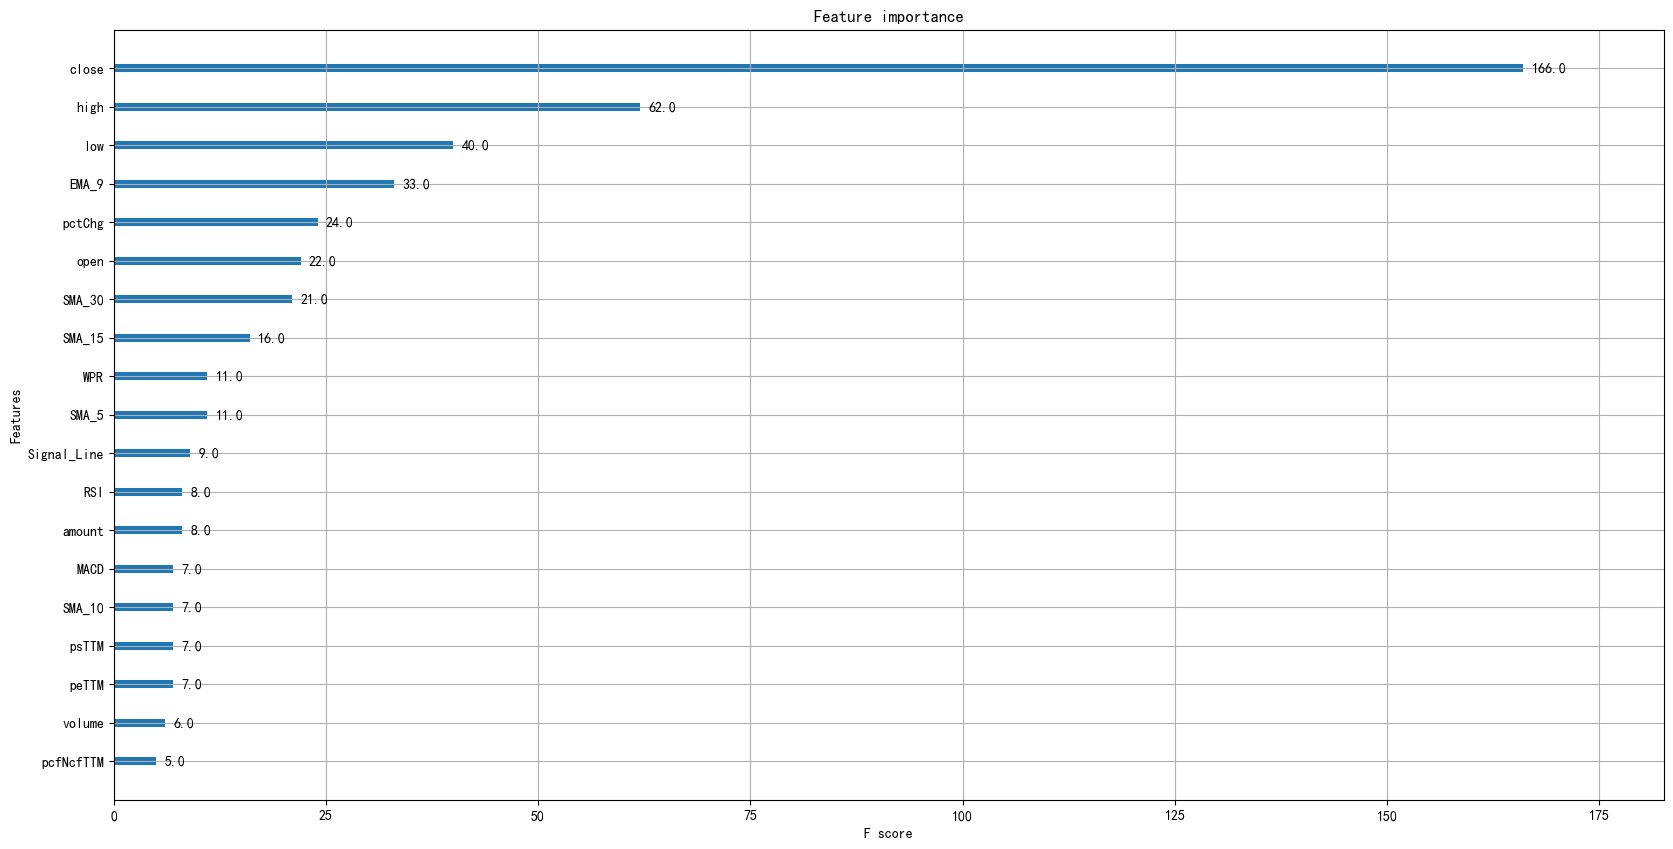

In [17]:
model = xgb.XGBRegressor(**grid.best_params_, objective='reg:linear')
model.fit(x_train_xgb, y_train_xgb, eval_set=eval_set, verbose=False)

plot_importance(model)

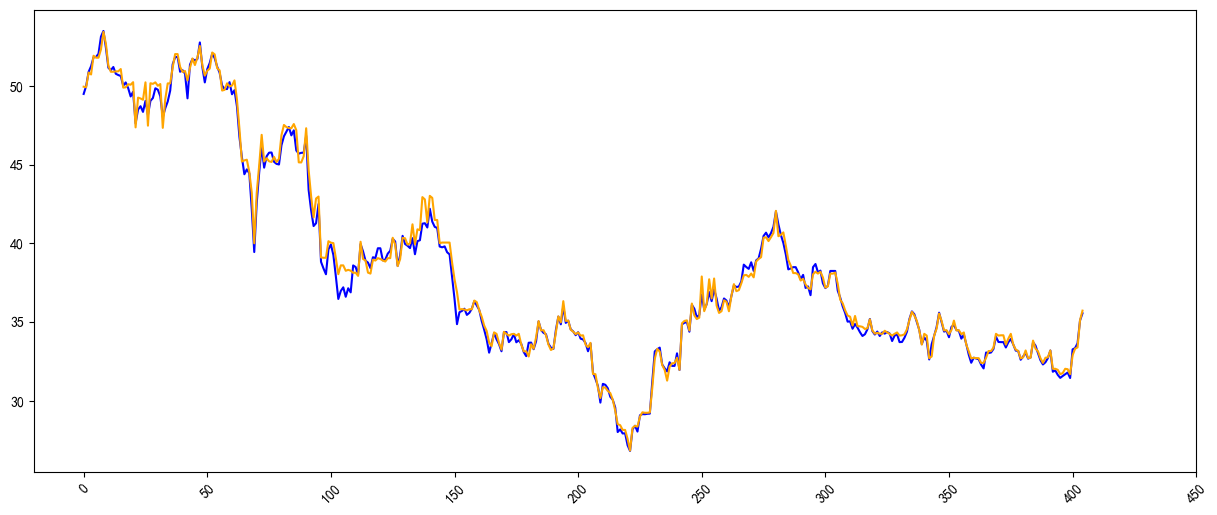

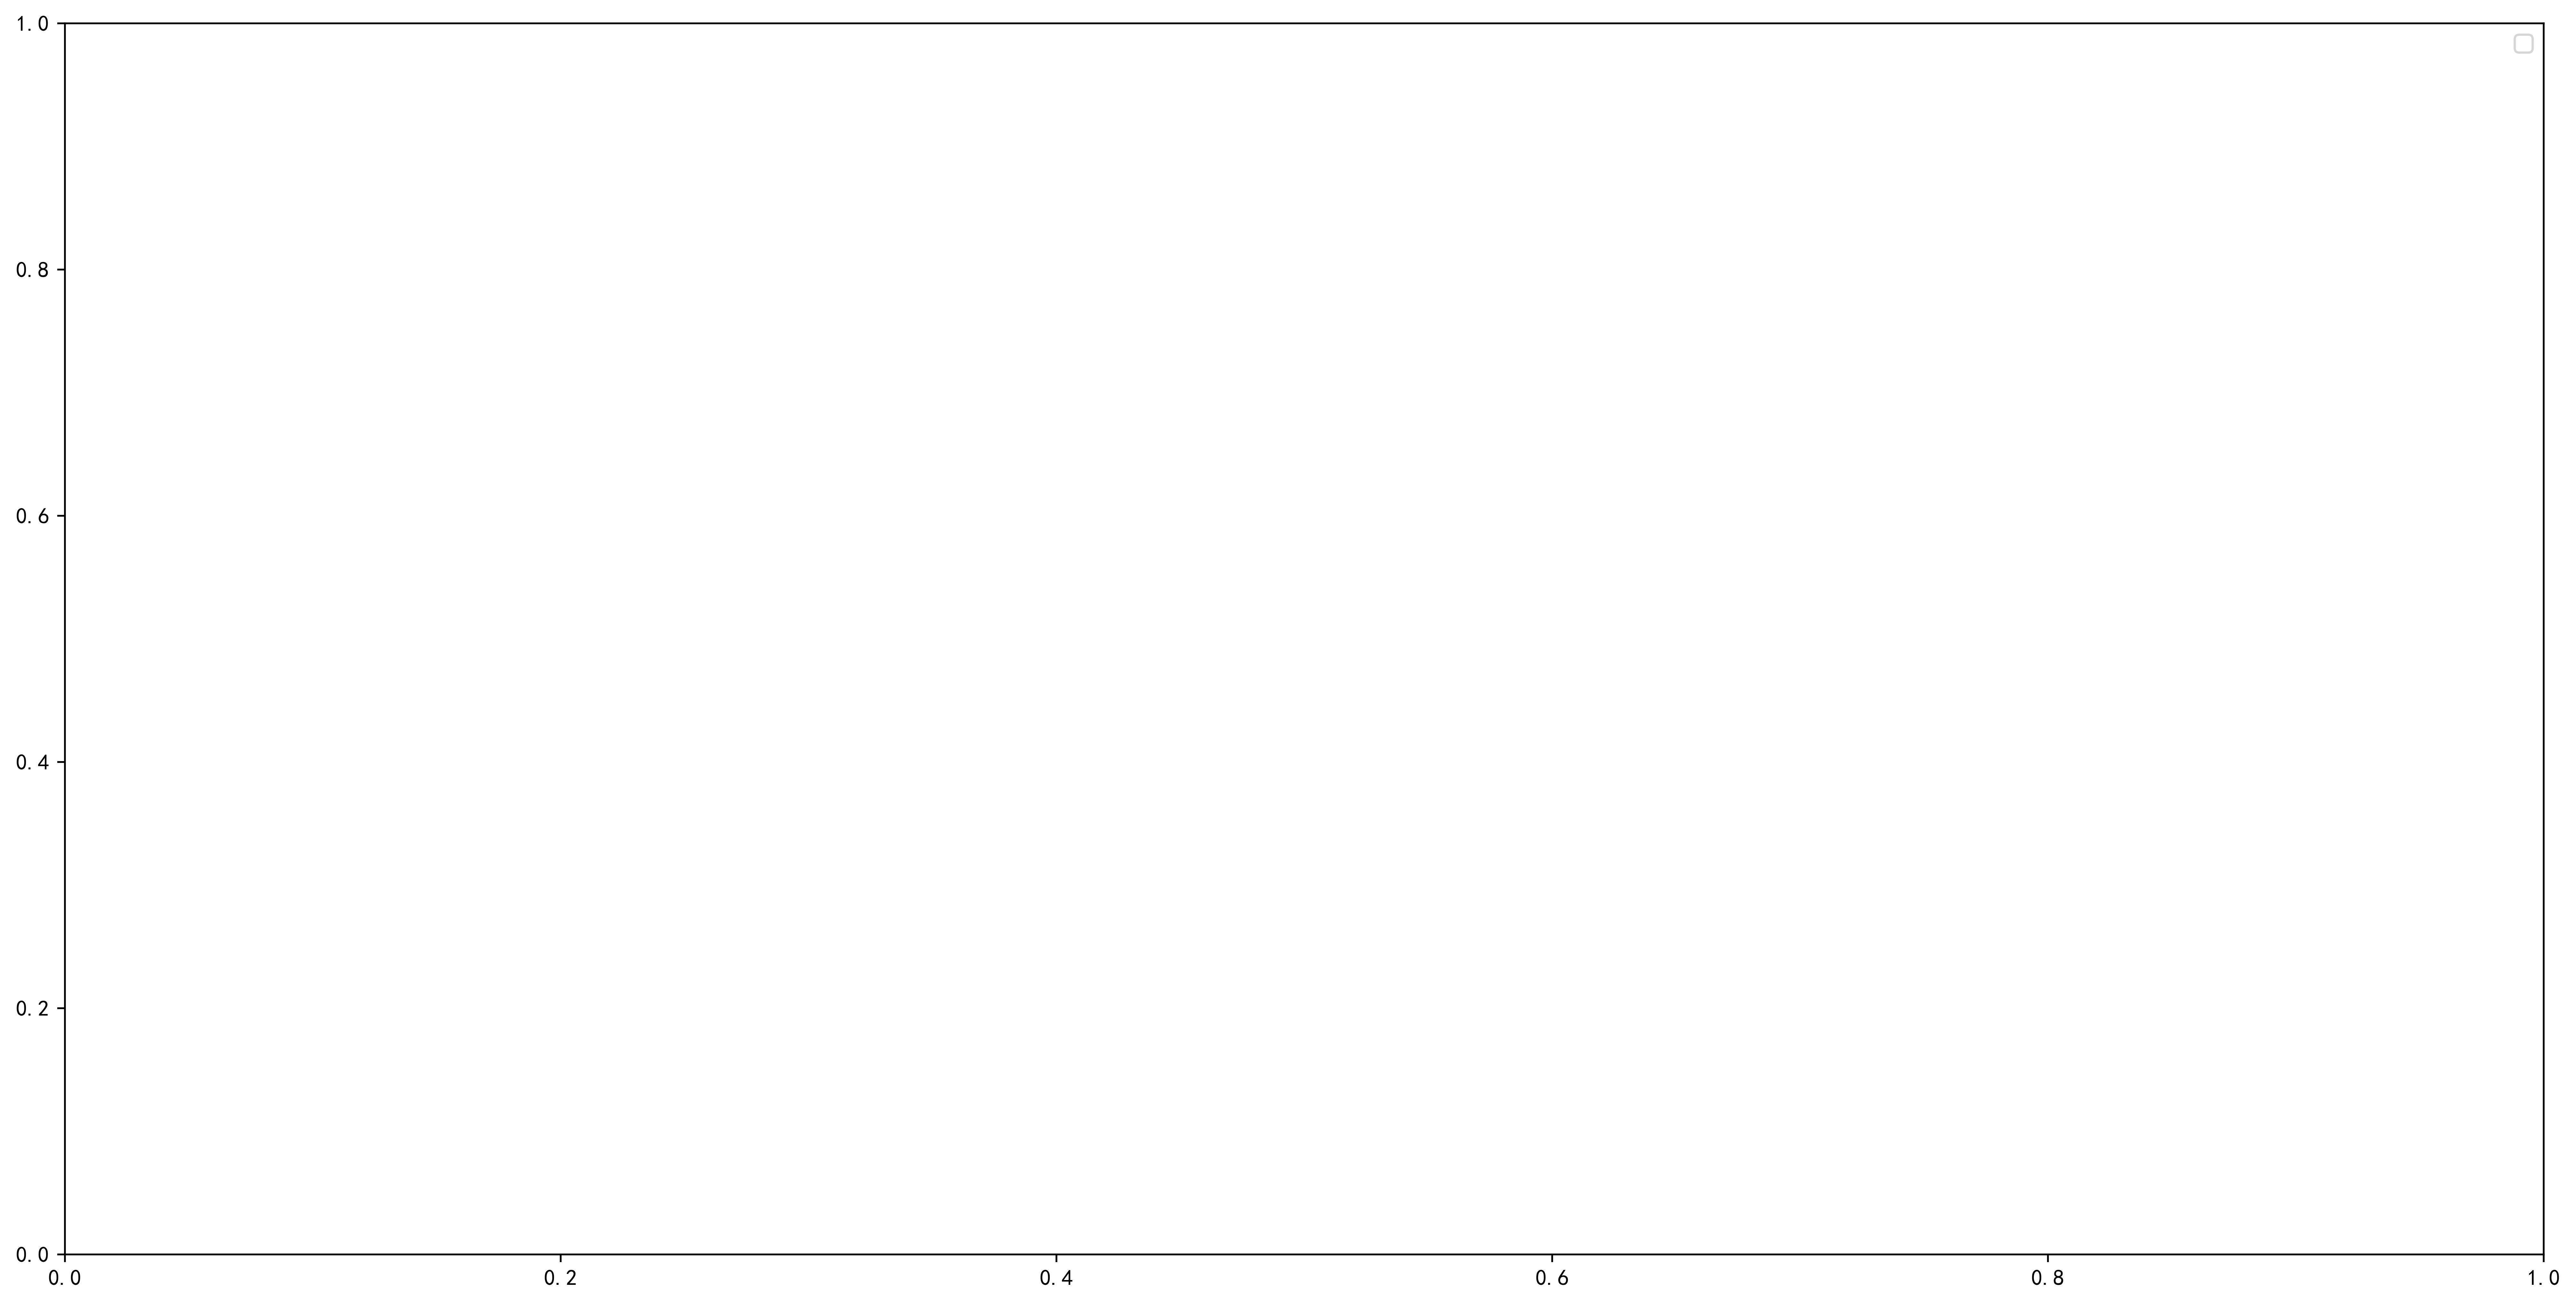

In [18]:
preds_xgb = model.predict(x_test_xgb).reshape(-1, 1)
preds_xgb_invscaled = scaler_y.inverse_transform(preds_xgb)
plt.figure(figsize=(15, 6))
test_pred_xgb = new_df[['close']].copy()[train_size:-1]
test_pred_xgb['predictions'] = preds_xgb_invscaled
plt.plot(test_pred_xgb.index[2:],test_pred_xgb['close'][2:],color='blue',label='price')
plt.plot(test_pred_xgb.index[2:],test_pred_xgb['predictions'][2:],color='orange',label='predict')
plt.xticks(test_pred_xgb.index[::20], rotation = 45)
plt.xticks (np.arange (0, 451, 50), np.arange (0, 451, 50))
plt.figure(dpi=500)
plt.legend(['close','predictions'])

In [19]:
#calculate MSE, RMSE
from sklearn.metrics import mean_squared_error

mse_xgb = mean_squared_error(test_pred_xgb.iloc[0], test_pred_xgb.iloc[1])
rmse_xgb = np.sqrt(mse_xgb) 
mape_xgb = np.mean(np.abs((test_pred_xgb.iloc[0] - test_pred_xgb.iloc[1]) / test_pred_xgb.iloc[0])) * 100
from sklearn.metrics import mean_absolute_error
import numpy as np

mae_xgb = mean_absolute_error(test_pred_xgb.iloc[0], test_pred_xgb.iloc[1])
rmae_xgb = np.sqrt(mae_xgb)
from sklearn.metrics import r2_score
r2_xgb = r2_score(test_pred_xgb.iloc[0], test_pred_xgb.iloc[1])
# Assuming a threshold of 0.1
threshold = 0.1
# Calculate the absolute difference between predicted and true values
diff_xgb = np.abs(test_pred_xgb.iloc[0] - test_pred_xgb.iloc[1])
# Determine if the difference is less than the threshold
correct_xgb = diff_xgb < threshold
# Calculate accuracy
accuracy_xgb = np.mean(correct_xgb)
print('MSE of Prediction: ', mse_xgb, '\n')
print('RMSE of Prediction: ', rmse_xgb)
print('RMAE of Prediction: ', rmae_xgb)
print('MAPE of Prediction: ', mape_xgb)
print('R^2 of Prediction: ', r2_xgb)
print('Accuracy of Prediction: ', accuracy_xgb)

XGB预测结果的MSE：  0.27683598644291085 

XGB预测结果的RMSE：  0.5261520563895107
XGB预测结果的RMAE：  0.6962038922752021
XGB预测结果的MAPE：  0.9620183455450579
XGB预测结果的R^2：  -5.929223520127242
XGB预测结果的Accuracy：  0.0
